# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Attribute Information](#3.5_Attribute_information)
      * [3.5.1 Table 1. Cleveland dataset 14 features and descriptions.](#3.5.1_Correlation)
  * [3.6 Explore The Data](#3.6_Explore_The_Data)
      * [3.6.1 Finding the correlation among attributes](#3.6.1_Correlation)
  * [3.7 Summary](#3.7_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

Predicting and diagnosing heart disease is the biggest challenge in the medical industry and relies on factors such as the physical examination, symptoms and signs of the patient.

Factors that influence heart disease are body cholesterol levels, smoking habit and obesity, family history of illnesses, blood pressure, and work environment. Machine learning algorithms play an essential and precise role in the prediction of heart disease.

Advances in technology allow machine language to combine with Big Data tools to manage unstructured and exponentially growing data. Heart disease is seen as the world’s deadliest disease of human life. In particular, in this type of disease, the heart is not able to push the required amount of blood to the remaining organs of the human body to perform regular functions.

Heart disease can be predicted based on various symptoms such as age, gender, heart rate, etc. and reduces the death rate of heart patients.

Due to the increasing use of technology and data collection, we can now predict heart disease using machine learning algorithms. Now let’s go further with the task of heart disease prediction using machine learning with Python.

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
## Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

## Sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas
import pandas as pd

## Numpy
import numpy as np

## Misc
from string import ascii_letters
import warnings
import os 
import joblib
from time import time
from scipy import stats
import itertools
import subprocess
from library.sb_utils import save_file

### 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [2]:
#Get the current working directory of a process and print 
MyWorkingDir = os.getcwd()
print(MyWorkingDir)

/Users/aquinojoeanson/Desktop/SPRINGBOARD/Capstone_Project_2/Notebook


In [3]:
# load and read the Dataset Cleveland.csv on woking directory
# and fed into DataFrame or df
path = MyWorkingDir = '/Users/aquinojoeanson/Desktop/SPRINGBOARD/Capstone_Project_2/Data/Cleveland.csv'
df = pd.read_csv('/Users/aquinojoeanson/Desktop/SPRINGBOARD/Capstone_Project_2/Data/Cleveland.csv', header = None)

## 3.5 Attribute Information<a id='3.5_Attribute_information'></a>

Experiments with the Cleveland database have concentrated on simply attempting to distinguish the presence of Heart Disease from absence.

Table 1. Cleveland dataset 14 features and descriptions.

| Features|Description|Values
|----|----|----|
|(age)            |Age in years|
|(sex)            |Sex|1 = Male
|    |            |0 = Female
|(cp)             |Chest Pain type
|     |           |1: typical angina
|     |           |2: atypical angina
|     |           |3: non-anginal pain
|     |           |4: asymptomatic
|(trestbps)       |Resting blood pressure (mm/hg)
|(chol)           |Serum cholesterol (mg/dl)
|(fbs)            |Fasting blood sugar > 120 mg/dl)  
|     |           |1 = True
|     |           |0 = False
|(restecg)        | Resting Electrocardiographic results
|     |           |0: normal
|      |          |1: having ST-T wave abnormality 
|      |          |2: showing probable
|(thalach)       | Maximum Heart Rate achieved
|(exang)         |Exercise induced angina 
|      |         |1 = Yes
|      |         |0 = No
|(oldpeak)       |ST depression induced by exercise relative to rest
|(slope)         |Slope of Peak Exercise ST Segment	
|      |         |1: Upsloping
|      |         |2: Flat
|      |         |3: Downsloping
|(ca)|	Number of Major Vessels colored by Fluoroscopy		
|||0= Zero fluroscopy colored Major Vessels
|||1= One fluroscopy colored Major Vessels
|||2= Two fluroscopy colored Major Vessels
|||3= Three fluroscopy colored Major Vessels
|(thal)          |Thalassemia
|||3 = Normal 
|||6 = Fixed defect 
|||7 = Reversable defect
|(num) |	Diagnosis
|||0 = No Heart Disease
|||>0 = with Heart Disease

Lets add our features to the data...

In [4]:
#Adding features to the dataset for more visual understanding.
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'num']

In [5]:
# Lets view our dataset with our features in place.
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


Changed the 'num' column values to between 0 or 1 for binary classification. "Remember on 'num' or Diagnosis if value = 0 the person has NO Heart Disease and if the value is < 0 the patient has Heart Disease.

In [6]:
# Change num values > 0 to 1 for a Diagnosis to get our data ready for the next steps.
df['num'] = np.where((df['num']>0),1,0)

#Lets inspect the information about the data to understand its type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


There were two features that contained "object" values:

1. 'ca' Number of major Vessels colored by Fluoroscopy

2. 'thal' Thalassemia

Out of these two features, there was a unique value of ? indicating a missing value. This was found from the following:

In [8]:
df['ca'].unique()
df['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

There were only 4 and 2 counts respectively for each. This is assumed not to be a significant number of instances and thus these instances are removed as follows:

In [9]:
sum(df['ca'].values=='?')
droplist=df.loc[df['ca']=='?'].index.tolist()
df.drop(droplist,axis=0,inplace=True)
df['ca']=df['ca'].astype(str).astype(float).astype(int)

sum(df['thal'].values=='?')
droplist=df.loc[df['thal']=='?'].index.tolist()
df.drop(droplist,axis=0,inplace=True)
df['thal']=df['thal'].astype(str).astype(float).astype(int)

In addition, missing values were also checked by using the following:

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

At this point, there are no missing values.

In [11]:
pd.set_option('display.max_rows', df.shape[0]+1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [12]:
#Replace '?' to NaN
df.replace("?",np.nan, inplace = True)

In [13]:
# Lets check for any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [14]:
#We have 6 Nan values caming from 'ca' with 4 and 'thal' with 2

In [15]:
#on are last Dataframe display we only can see the first 5 and bottom 5 rows of the data. By using display.max_rows we can see the whole data 
pd.set_option('display.max_rows', df.shape[0]+1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


now we can see our whole data. And can have a quick check if we are having missing data.

In [16]:
#checking data types
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

### 3.6 Explore The Data<a id='3.6_Explore_the_Data'></a>

Before training we need to observe and analyse the data to see what we are going to work with. The goal here is to learn more about the data and become a topic export on the dataset you are working with.

Let's now move on to exploratory data analysis:

In [17]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.54,0.68,3.16,131.69,247.35,0.14,1.00,149.60,0.33,1.06,1.60,0.68,4.73,0.46
std,9.05,0.47,0.96,17.76,52.00,0.35,0.99,22.94,0.47,1.17,0.62,0.94,1.94,0.50
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,243.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,276.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,1.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,1.00


### Finding the correlation among attributes

<AxesSubplot:xlabel='With Heart Disease              Without Heart Disease', ylabel='Age'>

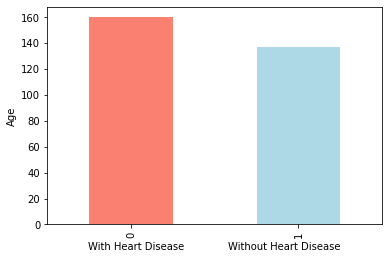

In [18]:
df.num.value_counts().plot(ylabel='Age', xlabel='With Heart Disease              Without Heart Disease', kind="bar", color=["salmon", "lightblue"])

We have 160 people with heart disease and 138 people without heart disease, so our problem is balanced.

In [19]:
# Checking for messing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

This dataset looks perfect to use as we don’t have null values.

In [20]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
sex : [1 0]
cp : [1 4 3 2]
trestbps : [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
chol : [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 160 394 184 315 409 244 195 196 126 313 259 200 262
 215 228 193 271 210 327 149 295 306 178 237 218 223 242 319 166 180 311
 278 342 169 187 157 176 241 131]
f

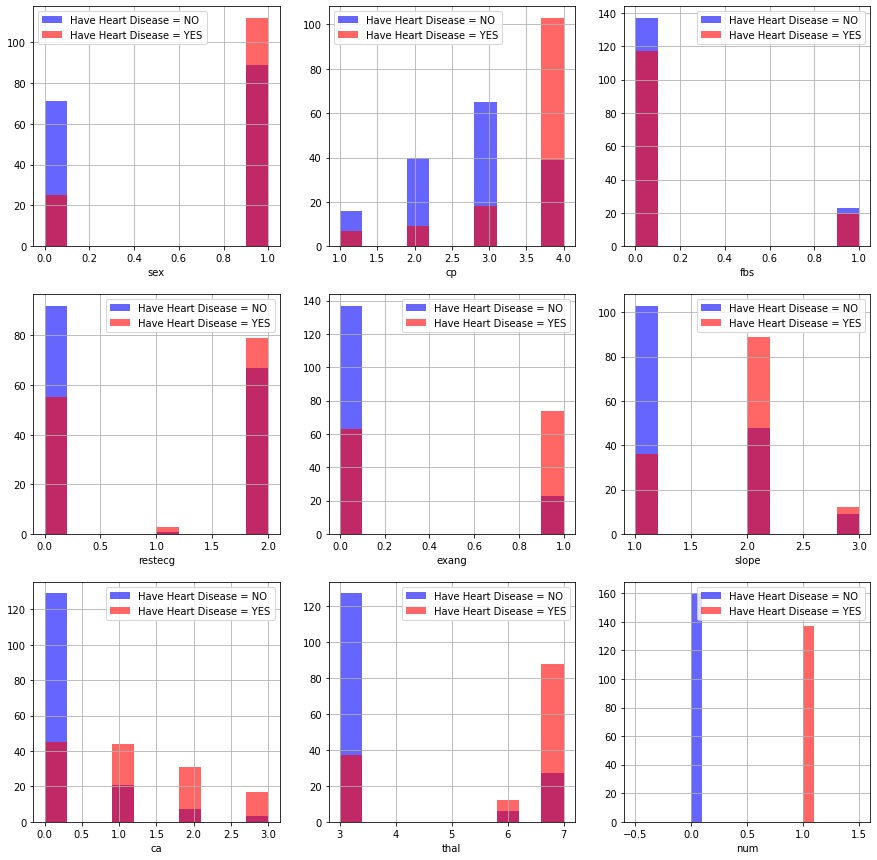

In [21]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["num"] == 0][column].hist(bins=10, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["num"] == 1][column].hist(bins=10, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

1. 'cp' {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.

2. 'restecg' {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.

3. 'exang' {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)

4. 'slope' {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

5. 'ca' {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.

6. 'thal' {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

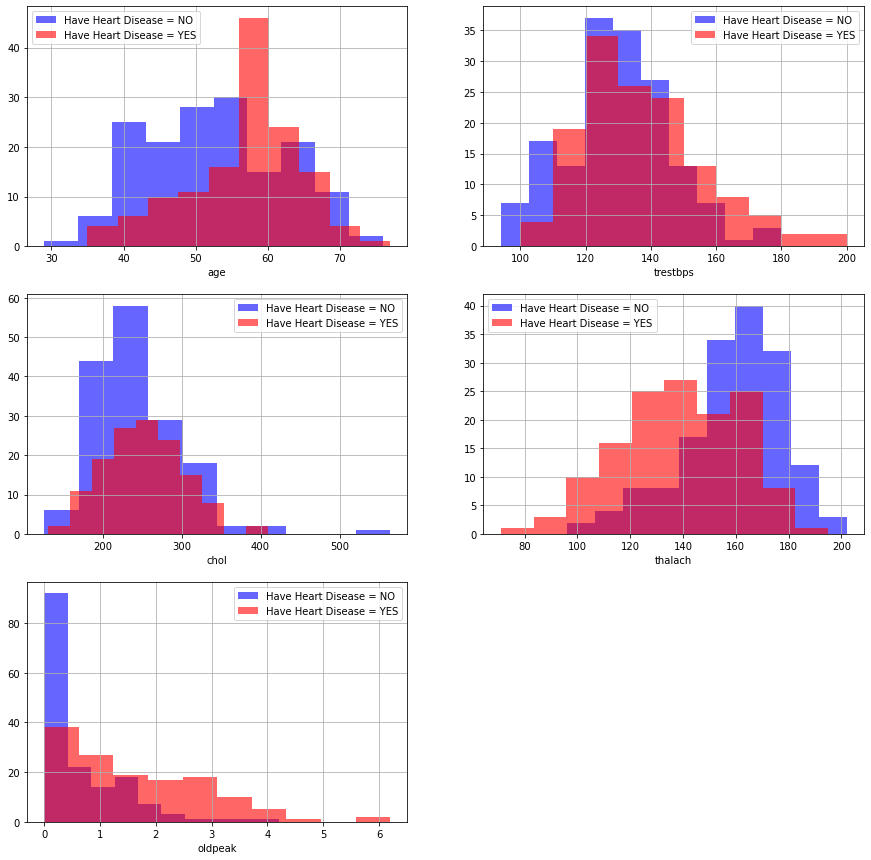

In [22]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["num"] == 0][column].hist(bins=10, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["num"] == 1][column].hist(bins=10, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

1. 'trestbps': resting blood pressure anything above 130-140 is generally of concern
2. 'chol': greater than 200 is of concern.
3. 'thalach': People with a maximum of over 140 are more likely to have heart disease.
4.  'oldpeak' of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

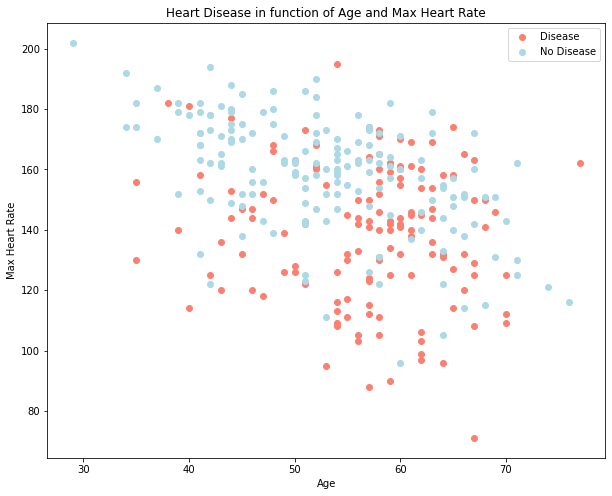

In [23]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.num==1],
            df.thalach[df.num==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.num==0],
            df.thalach[df.num==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

<AxesSubplot:>

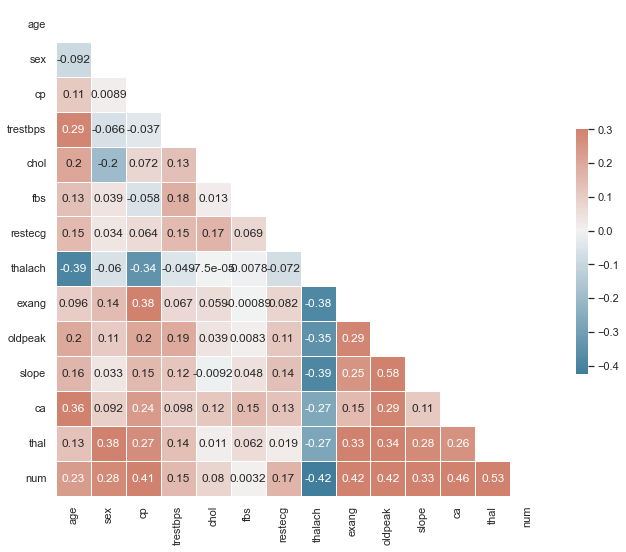

In [24]:
# Let's make our correlation matrix a little prettier with Half Heatmap
sns.set_theme(style='white')

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:title={'center':'Correlation with target'}>

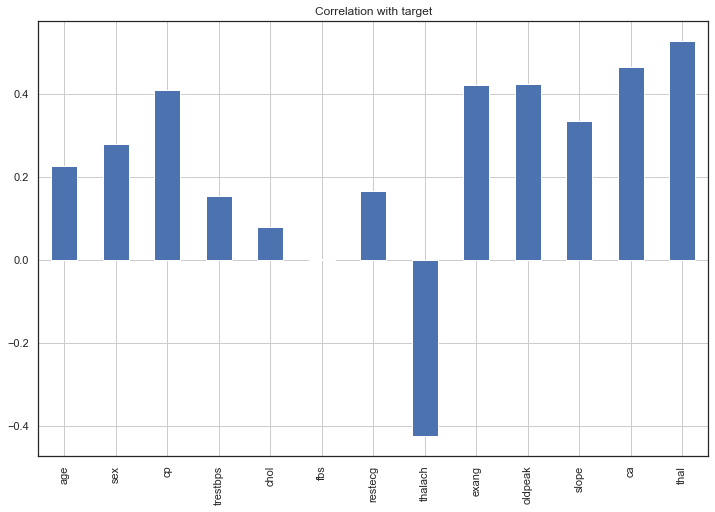

In [25]:

df.drop('num', axis=1).corrwith(df.num).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

1. fbs and chol are the least correlated with the target variable.
2. All other variables have a significant correlation with the target variable.

# 3.6 Summary<a id='3.6_Summary'></a>